<a href="https://colab.research.google.com/github/eriktaylor/Transformer-introduction/blob/main/DYNOv2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import urllib.request
import matplotlib.pyplot as plt
import torch
from transformers import AutoImageProcessor, AutoModelForImageClassification

In [2]:
#load images from wikimedia

url_list = ["https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Dog_%28Canis_lupus_familiaris%29_%285%29.JPG/640px-Dog_%28Canis_lupus_familiaris%29_%285%29.JPG",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Dhole%28Asiatic_wild_dog%29.jpg/640px-Dhole%28Asiatic_wild_dog%29.jpg",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Male_Bolognese_Dog_Walking.jpg/640px-Male_Bolognese_Dog_Walking.jpg",
            "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Greenland_467_%2835130903436%29_%28cropped%29.jpg/640px-Greenland_467_%2835130903436%29_%28cropped%29.jpg"]

file_list = []

for val, url in enumerate(url_list):
  filename = f"dog_{val}.jpg"
  file_list.append(filename)
  urllib.request.urlretrieve(url, filename)


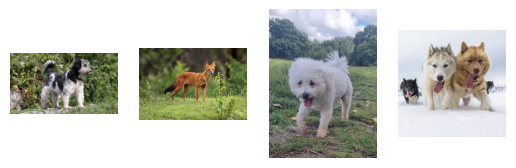

In [3]:
#view the images in PIL format

fig, axs = plt.subplots(1, len(file_list))

for i in range(len(file_list)):
  axs[i].imshow(Image.open(file_list[i]))
  axs[i].axis('off')  # Turn off axis labels

plt.show()

In [4]:
processor = AutoImageProcessor.from_pretrained('facebook/dinov2-large-imagenet1k-1-layer')
model = AutoModelForImageClassification.from_pretrained('facebook/dinov2-large-imagenet1k-1-layer')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/58.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.23G [00:00<?, ?B/s]

In [51]:
batch_size = len(file_list)
class_list = []

for i in range(batch_size):
  img = Image.open(file_list[i])
  inputs = processor(images=img, return_tensors="pt")
  outputs = model(**inputs)
  logits = outputs.logits
  value = torch.topk(logits, 3)
  dog_label = []
  print("Top three predicted labels, image ", i)
  for item in value[1].squeeze().numpy():
    dog_label.append(model.config.id2label[item])

  #make a list of top three labels for each image
  print(dog_label)
  class_list.append(dog_label)

Top three predicted labels, image  0
['wire-haired fox terrier', 'Tibetan terrier, chrysanthemum dog', 'Dandie Dinmont, Dandie Dinmont terrier']
Top three predicted labels, image  1
['dhole, Cuon alpinus', 'red wolf, maned wolf, Canis rufus, Canis niger', 'dingo, warrigal, warragal, Canis dingo']
Top three predicted labels, image  2
['toy poodle', 'miniature poodle', 'Maltese dog, Maltese terrier, Maltese']
Top three predicted labels, image  3
['dogsled, dog sled, dog sleigh', 'Eskimo dog, husky', 'Siberian husky']


In [52]:
class_list

[['wire-haired fox terrier',
  'Tibetan terrier, chrysanthemum dog',
  'Dandie Dinmont, Dandie Dinmont terrier'],
 ['dhole, Cuon alpinus',
  'red wolf, maned wolf, Canis rufus, Canis niger',
  'dingo, warrigal, warragal, Canis dingo'],
 ['toy poodle', 'miniature poodle', 'Maltese dog, Maltese terrier, Maltese'],
 ['dogsled, dog sled, dog sleigh', 'Eskimo dog, husky', 'Siberian husky']]